# Occlusion detection

In [1]:
# Numpy, Pillow, Imageio, math libraries were used to do the following program. 
import numpy as np
from PIL import Image, ImageOps
import imageio as mp
import math as mh

In [2]:
#Image_1 was opened using pillow library.
Image_1=Image.open('IMG1.png')

In [3]:
#Image_2 was opened using pillow library.
Image_2=Image.open('IMG2.png')

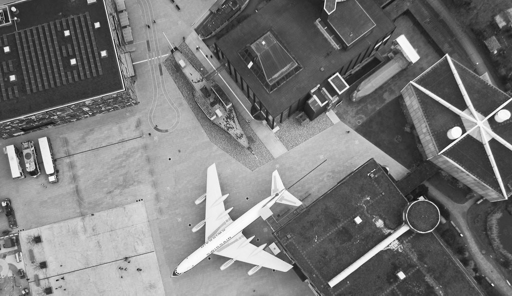

In [4]:
#This is Image_1.
Image_1

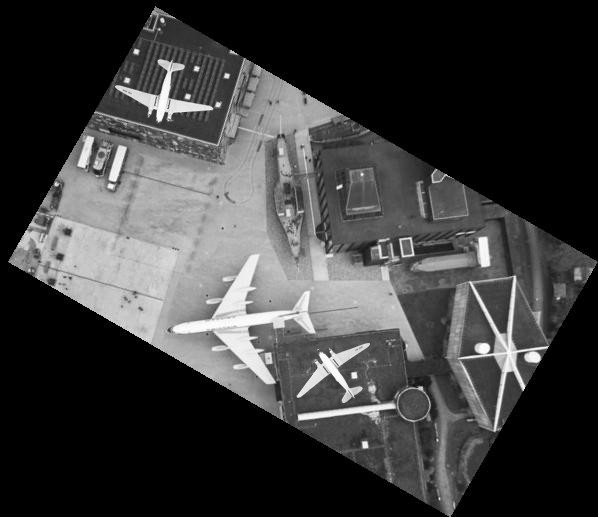

In [5]:
#This is Image_2.
Image_2

In [6]:
#Converts image into matrix.
matrix_image1=mp.imread('IMG1.png')

In [7]:
matrix_image1

Array([[131, 129, 129, ...,  89,  87,  78],
       [133, 132, 131, ...,  91,  87,  77],
       [132, 134, 133, ...,  96,  92,  81],
       ...,
       [130, 128, 137, ..., 135, 130, 124],
       [137, 141, 143, ..., 135, 126, 125],
       [141, 147, 148, ..., 122, 125, 133]], dtype=uint8)

In [8]:
#Converts image into matrix.
matrix_image2=mp.imread('IMG2.png')

In [9]:
matrix_image2

Array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [10]:
#The following points corespondence from image_1 to image_2.
#Here (xs1,ys1) is the pixel value in source image(image_1) and the same pixel value is in the target image(image_2) at (xt1,yt1).
(xs1,ys1),(xt1,yt1),(xs2,ys2),(xt2,yt2)=(29,124),(93,248),(157,372),(328,399)

In [11]:
# here the angle of rotation(inplane) from image_1 to image_2 is found out and alpha1, alpha2, beta1 , beta2 are variables assigned.
alpha1=xt2-xt1
alpha2=yt2-yt1
beta1=xs2-xs1
beta2=ys2-ys1
cos_theta=(alpha1*beta1+beta2*alpha2)/(beta1**2+beta2**2)
theta=mh.acos(cos_theta)

In [12]:
#conversion from Radians to degree.
angle=mh.degrees(theta)

In [13]:
#Angle of Rotation
angle

29.88945294326564

In [14]:
#Value of cos(theta)
mh.cos(theta)

0.866988496302383

In [15]:
#value of tx and ty are found out from this equation.  
tx=xt1-(xs1*mh.cos(theta))+(ys1*mh.sin(theta))
ty=-yt1+(xs1*mh.sin(theta))+(ys1*mh.cos(theta))

In [16]:
#A,B siginifies rows and columns of the matrix_image2 using shape function
A,B=matrix_image2.shape

In [17]:
#Zero matrix of M*N is created and assigned as MATRIX.
MATRIX=np.zeros((A,B))

In [18]:
tx

129.65002448056174

In [19]:
ty

-126.04191004458038

In [20]:
#Each element in the MATRIX is assigned the value from the matrix_image2 using Bilinear Interpolation method.
for xt in range(A):
    for yt in range(B):
        xs=mh.cos(theta)*(xt-tx)+mh.sin(theta)*(yt-ty)
        ys=mh.cos(theta)*(yt-ty)-mh.sin(theta)*(xt-tx)
        a=ys-int(ys)
        b=xs-int(xs)
        z=0
        if 0<=xs<=(A-1) and 0<=ys<=(B-1):
            z=(1-a)*(1-b)*matrix_image2[int(xs),int(ys)]+(1-a)*(b)*matrix_image2[int(xs),int(ys)+1]+(a)*(1-b)*matrix_image2[int(xs)+1,int(ys)]+(a)*(b)*matrix_image2[int(xs)+1,int(ys)+1]
            MATRIX[xt,yt] = mh.floor(z)
        else:
            MATRIX[xt,yt]=0
        

In [21]:
#Converts the MATRIX to the Transformed_Image.
Transformed_Image=Image.fromarray(MATRIX)

In [22]:
#Transformed_Image is displayed.
Transformed_Image.show()

In [23]:
#Transformed_Image is croped by using croped function.
Transformed_Image2=Transformed_Image.crop((11,58,523,354))

In [24]:
#Transformed_Image2 is displayed i.e cropped image.
Transformed_Image2.show()

In [25]:
#Converts image into matrix.
Transformed_Image2_matrix=np.array(Transformed_Image2)

In [26]:
Transformed_Image2_matrix

array([[ 31.,  75., 108., ...,  25.,  43.,   0.],
       [ 23., 132., 146., ...,  51.,  69.,   0.],
       [ 76., 137., 124., ...,  98.,  90.,  57.],
       ...,
       [ 86., 131., 147., ..., 123.,  97.,  19.],
       [142.,  91.,  37., ..., 127., 103.,  17.],
       [ 67.,  42., 116., ...,  84.,   0.,   0.]], dtype=float32)

In [27]:
#Transformed_Image2_matrix is subtracted from the intially matrix of image1.
Final_Matrix=Transformed_Image2_matrix-matrix_image1

In [28]:
Final_Matrix

Array([[-100.,  -54.,  -21., ...,  -64.,  -44.,  -78.],
       [-110.,    0.,   15., ...,  -40.,  -18.,  -77.],
       [ -56.,    3.,   -9., ...,    2.,   -2.,  -24.],
       ...,
       [ -44.,    3.,   10., ...,  -12.,  -33., -105.],
       [   5.,  -50., -106., ...,   -8.,  -23., -108.],
       [ -74., -105.,  -32., ...,  -38., -125., -133.]], dtype=float32)

In [29]:
#Converts the Final_Matrix to the Final_image.
Final_image=Image.fromarray(Final_Matrix)

In [30]:
#Final image is displayed.
Final_image.show()